<a href="https://colab.research.google.com/github/klinhle2306/Seattle-Weather/blob/main/Seattle_St_Louis_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This notebook contains graphs and plots that answer the question of whether it rains more in Seattle, WA than in St. Louis, MO.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

The NOAA National Centers for Environmental Information [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) provides the records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

The data are available at this [github repository](https://github.com/klinhle2306/Seattle-Weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

The dataset in this notebook is a clean version that is produced using this [Notebook](https://colab.research.google.com/drive/11gHoJ-vCoBQC0VwuywqBTIhNtkLCDVuH?authuser=1#scrollTo=fDJ80Omny91y).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/klinhle2306/Seattle-Weather/main/clean_seattle_stl_weather.csv')

In [ ]:
df

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.00,1,1
1,2018-01-02,STL,0.00,2,1
2,2018-01-03,STL,0.00,3,1
3,2018-01-04,STL,0.00,4,1
4,2018-01-05,STL,0.00,5,1
...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12
3648,2022-12-28,SEA,0.40,362,12
3649,2022-12-29,SEA,0.03,363,12
3650,2022-12-30,SEA,0.62,364,12


## Exploratory Questions

1. How many days in a year does it rain in Seattle and St. Louis?
2. What is the frequency distribution of daily precipitation in Seattle and St. Louis?
3. How has the average monthly precipitation in Seattle and St. Louis changed over the years?

## Analysis

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,STL,0.00,1,1,2018
1,2018-01-02,STL,0.00,2,1,2018
2,2018-01-03,STL,0.00,3,1,2018
3,2018-01-04,STL,0.00,4,1,2018
4,2018-01-05,STL,0.00,5,1,2018
...,...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12,2022
3648,2022-12-28,SEA,0.40,362,12,2022
3649,2022-12-29,SEA,0.03,363,12,2022
3650,2022-12-30,SEA,0.62,364,12,2022


**1. How many days in a year does it rain in Seattle and St. Louis?**

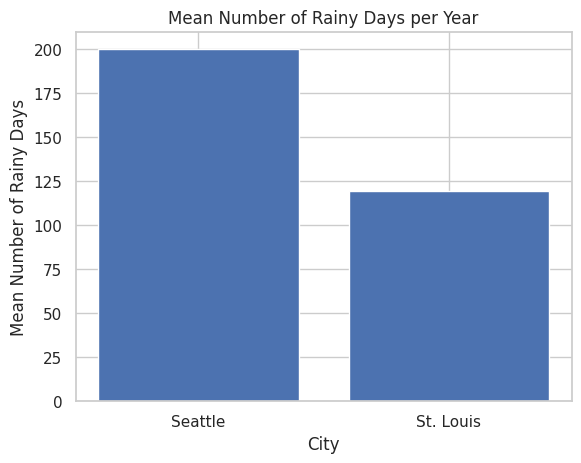

In [ ]:
# Group data by city and year, count the number of days with precipitation, and calculate the mean value
rainy_days = df.groupby(['city', 'year'])['precipitation'].apply(lambda x: (x > 0).sum()).reset_index(name='num_rainy_days')
rainy_days_mean = rainy_days.groupby('city')['num_rainy_days'].mean().reset_index(name='mean_rainy_days')

# Bar plot of mean number of days with precipitation
plt.bar(rainy_days_mean['city'], rainy_days_mean['mean_rainy_days'])
plt.xlabel('City')
plt.xticks(ticks=plt.xticks()[0], labels=['Seattle', 'St. Louis'])
plt.ylabel('Mean Number of Rainy Days')
plt.title('Mean Number of Rainy Days per Year')
plt.show()

The graph displays the average annual number of days with precipitation in Seattle and St. Louis. We can observe from the chart that Seattle has more mean annual precipitation days than St. Louis does. This shows that Seattle experiences more rain than St. Louis does.

**2. What is the frequency distribution of daily precipitation in Seattle and St. Louis?**

In [ ]:
sea_data = df[df['city'] == 'SEA']
stl_data = df[df['city'] == 'STL']

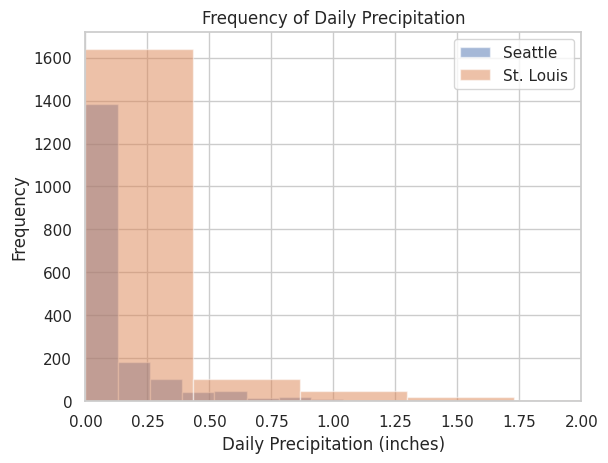

In [ ]:
# Create histograms of daily precipitation for Seattle and St. Louis
plt.hist(sea_data['precipitation'], bins=20, alpha=0.5, label='Seattle')
plt.hist(stl_data['precipitation'], bins=20, alpha=0.5, label='St. Louis')
plt.xlabel('Daily Precipitation (inches)')
plt.ylabel('Frequency')
plt.title('Frequency of Daily Precipitation')
plt.legend(loc='upper right')
plt.xlim(0,2);
plt.show()

According to this histogram, Seattle typically experiences more days with light rain (less than 0.2 inches) and heavy rain (more than 0.5 inches) than St. Louis . There are often more days with light rain and no rain in St. Louis. (between 0.2 and 0.5 inches).

**3. How has the average monthly precipitation in Seattle and St. Louis changed over the years?**

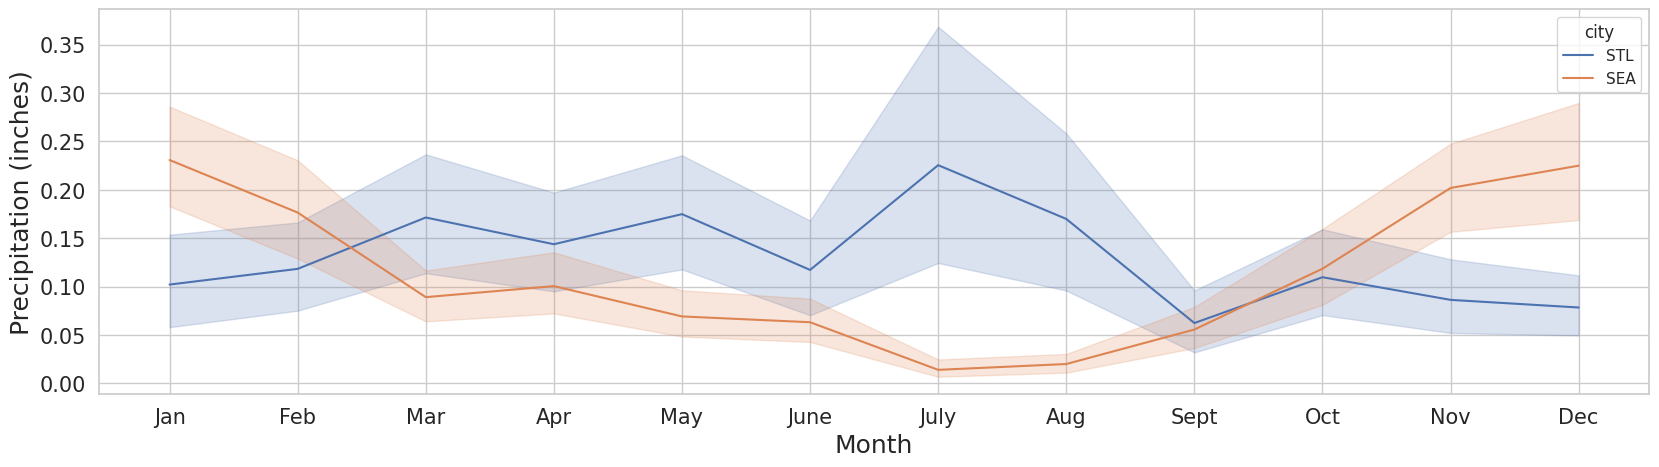

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

plt.tick_params(labelsize=15);

We could conclude from the graph that Seattle typically has higher annual precipitation levels than St. Louis. While precipitation is more evenly distributed throughout the year in St. Louis, there is a distinct seasonal pattern in Seattle, with more precipitation in the fall and winter months.

## Conclusion

From the three graphs, we can conclude that Seattle experience more rain than St. Louis. We can also notice a seasonal pattern in which Seattle rains more in the Fall and Winter months whereas St. Louis rains more evenly throughout the year. In addition, St. Louis also expereince more dry days compare to Seattle. Even though St. Louis's rainy days are more evenly distributed, Seattle still has more rainy days; therefore Seattle rains more than St. Louis.